In [1]:
# import system modules
import sys
import os
import gc
import argparse

# import standard numerical modules
import numpy as np
import math

import matplotlib.pyplot as plt

# import machine learning modules
import tensorflow as tf
import keras.backend as K

sys.path.append('../')
import DCTR


Madgraph was not found in PATH or in docker /tf/madgraph/MG5_aMC_v2_9_16 dir 
 can be added temporarily with sys.path.append('path/to/madgraph')


# Process Data

In [2]:
data_dir = '../../Data'


In [3]:

num_events = 9686913 # = num MiNNLO events


## hvq dielptonic


In [4]:
# dileptonic hvq has 1M events per LHE

X0 = []
X0_nJets = []
X0_jet = []
X0_no_b_jet = []
X0_b_jets = []
X0_b_quarks = []

data_dir_hvq = f'{data_dir}/POWHEG_hvq/dileptonic/20240916_Valentinas-samples'

# skipped_files = [1, 8, 10, 12, 14, 18] # due to corrupted files

for i in range(1, 1001):
    X0.extend(
        np.load(f'{data_dir_hvq}/converted_lhe_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )

    X0_nJets.extend(
        np.load(f'{data_dir_hvq}/jet_multiplicity_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    X0_jet.extend(
        np.load(f'{data_dir_hvq}/jet_4vectors_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    X0_b_jets.extend(
        np.load(f'{data_dir_hvq}/b_jets_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    X0_b_quarks.extend(
        np.load(f'{data_dir_hvq}/b_quarks_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    X0_no_b_jet.extend(
        np.load(f'{data_dir_hvq}/Nob_jets_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    if i % 50 == 0:
        print(f'read {i} files')

X0 = np.array(X0)
print(X0.shape)

# nrm data and save to disk (only needed to run once)
'''
nrm_array_dir = f'{data_dir}/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X0_nrm, _ = DCTR.normalize_data(X0.copy(), nrm_array)
X0_nrm = np.array(X0_nrm)
np.save(f'{data_dir_hvq}/normed_lhe_hvq_dileptonic_1M_1-1000_b-filtered.npy', X0_nrm)
'''
X0       = np.array(X0[:num_events])

X0_nJets = np.array(X0_nJets[:num_events])
X0_jet   = np.array(X0_jet[:num_events])

X0_b_jets    = np.array(X0_b_jets[:num_events])
X0_b_quarks  = np.array(X0_b_quarks[:num_events])



read 50 files
read 100 files
read 150 files
read 200 files
read 250 files
read 300 files
read 350 files
read 400 files
read 450 files
read 500 files
read 550 files
read 600 files
read 650 files
read 700 files
read 750 files
read 800 files
read 850 files
read 900 files
read 950 files
read 1000 files
(10000000, 3, 9)


In [5]:
X0_no_b_jet = np.array(X0_no_b_jet[:num_events])

X0_nrm = np.load(f'{data_dir_hvq}/normed_lhe_hvq_dileptonic_1M_1-1000_b-filtered.npy')[:num_events]
X0_wgt = X0_nJets[:,1]

print(X0.shape)
print(X0_nrm.shape)
print(X0_nJets.shape)
print(X0_jet.shape)


(9686913, 3, 9)
(9686913, 3, 9)
(9686913, 2)
(9686913, 24, 6)


## MiNNLO

In [6]:
gc.collect()


467

In [7]:
# MiNNLO has 10k events per lhe

data_dir_minnlo = f'{data_dir}/MiNNLO/showered/20240916_Valentinas-samples'

X1 = []
X1_nJets = []
X1_jet = []
X1_no_b_jet = []

X1_b_jets = []
X1_b_quarks = []


# skipped_files = [106, 126, 210]


for i in range(1, 1001):
    X1.extend(
        np.load(f'{data_dir_minnlo}/converted_lhe_hvq_dileptonic_1M_{i}_b-filtered.npy') # Valentina named both MiNNLO and hvq the same, but they are in different dirs
    )
    X1_nJets.extend(
        np.load(f'{data_dir_minnlo}/jet_multiplicity_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    X1_jet.extend(
        np.load(f'{data_dir_minnlo}/jet_4vectors_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    X1_b_jets.extend(
        np.load(f'{data_dir_minnlo}/b_jets_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    X1_b_quarks.extend(
        np.load(f'{data_dir_minnlo}/b_quarks_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    X1_no_b_jet.extend(
        np.load(f'{data_dir_minnlo}/Nob_jets_hvq_dileptonic_1M_{i}_b-filtered.npy')
    )
    if i % 50 == 0:
        print(f'read {i} files')

X1 = np.array(X1)
print(X1.shape)

# nrm data and save to disk (only needed to run once)
'''
nrm_array_dir = f'{data_dir}/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X1_nrm, _ = DCTR.normalize_data(X1.copy(), nrm_array)
np.save(f'{data_dir_minnlo}/normed_lhe_MiNNLO_10K_1-1000_b-filtered.npy', X1_nrm)
'''
X1       = np.array(X1[:num_events])
print(X1.shape)


X1_nJets = np.array(X1_nJets[:num_events])
X1_jet   = np.array(X1_jet[:num_events])

X1_b_jets   = np.array(X1_b_jets[:num_events])
X1_b_quarks = np.array(X1_b_quarks[:num_events])
X1_no_b_jet = np.array(X1_no_b_jet[:num_events])

X1_nrm = np.load(f'{data_dir_minnlo}/normed_lhe_MiNNLO_10K_1-1000_b-filtered.npy')[:num_events]
X1_wgt = X1_nJets[:, 1]

print(X1.shape)
print(X1_nrm.shape)
print(X1_nJets.shape)
print(X1_jet.shape)



read 50 files
read 100 files
read 150 files
read 200 files
read 250 files
read 300 files
read 350 files
read 400 files
read 450 files
read 500 files
read 550 files
read 600 files
read 650 files
read 700 files
read 750 files
read 800 files
read 850 files
read 900 files
read 950 files
read 1000 files
(9686913, 3, 9)
(9686913, 3, 9)
(9686913, 3, 9)
(9686913, 3, 9)
(9686913, 2)
(9686913, 24, 6)


In [8]:
gc.collect()


66

In [9]:
print(X0.shape)
print(X0_nrm.shape)
print(X0_nJets.shape)
print(X0_jet.shape)

print(X0_b_jets.shape)
print(X0_b_quarks.shape)


print(X1.shape)
print(X1_nrm.shape)
print(X1_nJets.shape)
print(X1_jet.shape)

print(X1_b_jets.shape)
print(X1_b_quarks.shape)


(9686913, 3, 9)
(9686913, 3, 9)
(9686913, 2)
(9686913, 24, 6)
(9686913, 2, 6)
(9686913, 2, 7)
(9686913, 3, 9)
(9686913, 3, 9)
(9686913, 2)
(9686913, 24, 6)
(9686913, 2, 6)
(9686913, 2, 7)


# prepare datasets

In [10]:
# delete energy from (normalized) testing dataset, since the neural network was trained without these parameters
X0_nrm = np.delete(X0_nrm, 5, -1) # E
X0_nrm = np.delete(X0_nrm, 4, -1) # eta

# garbage collection after deleting to clear memory asap
print(gc.collect())

print(X0_nrm.shape)
print(X0_nrm[0])


0
(9686913, 3, 7)
[[-0.82098067  1.04801316 -0.60778982 -0.36224038  0.          1.
   0.        ]
 [ 0.32316163  0.58336927 -0.36408115  0.23710697  0.6         1.
   0.        ]
 [ 0.14792083  1.22015506  1.403683    0.71193994 -0.6         1.
   0.        ]]


# compare datasets before reweighting

## hvq vs MiNNLO

In [11]:
print(max(X0_nJets[:,0]))
print(max(X1_nJets[:,0]))


17.0
17.0


/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


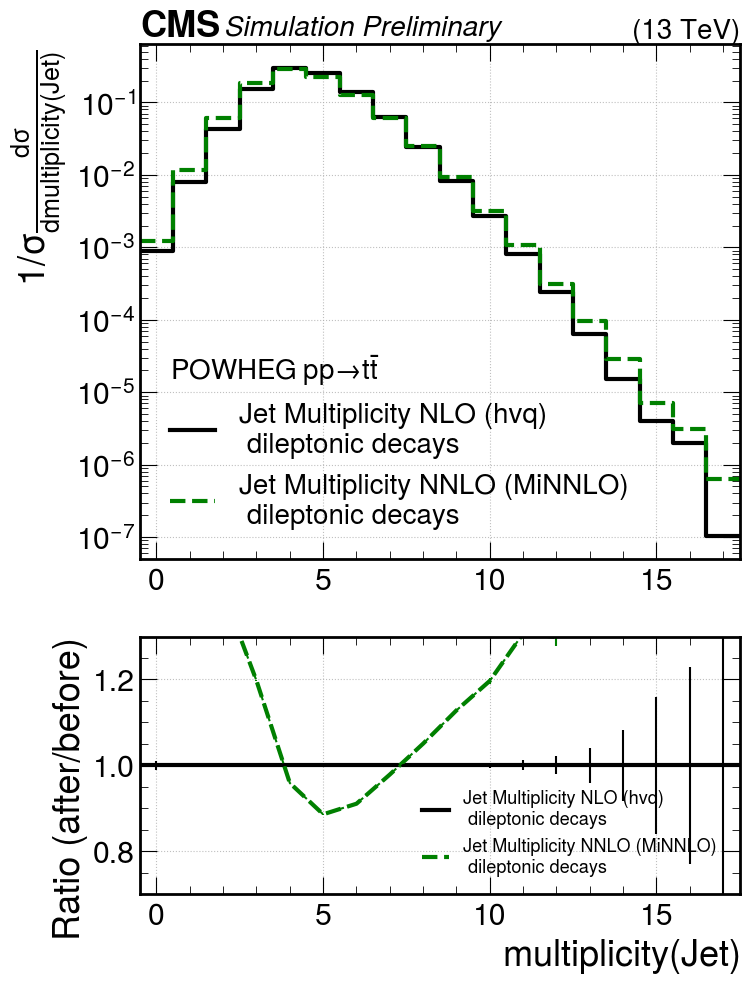

In [12]:
# jet multiplicity

args_multiplicity = [(X0_nJets[:,0], X0_wgt, 'Jet Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X1_nJets[:,0], X1_wgt, 'Jet Multiplicity NNLO (MiNNLO) \n dileptonic decays')]


bins = np.linspace(-0.5, 17.5, 19)

DCTR.plot_ratio_cms_2(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')



# DCTR reweighting


In [13]:
# calculate weights from DCTR trained on showered events
model = '../20240521_showered_new/train_20240523_regular_epochs.tf' # path to previously trained model (in .tf format (folder)) for showered events

dctr_rwgt = []
# calculate rwgt
with tf.device('CPU'):
    dctr_rwgt = DCTR.get_rwgt([model], X0_nrm) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook



2024-09-16 23:14:46.375872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-09-16 23:14:46.457722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2024-09-16 23:14:46.457949: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-09-16 23:14:46.469554: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

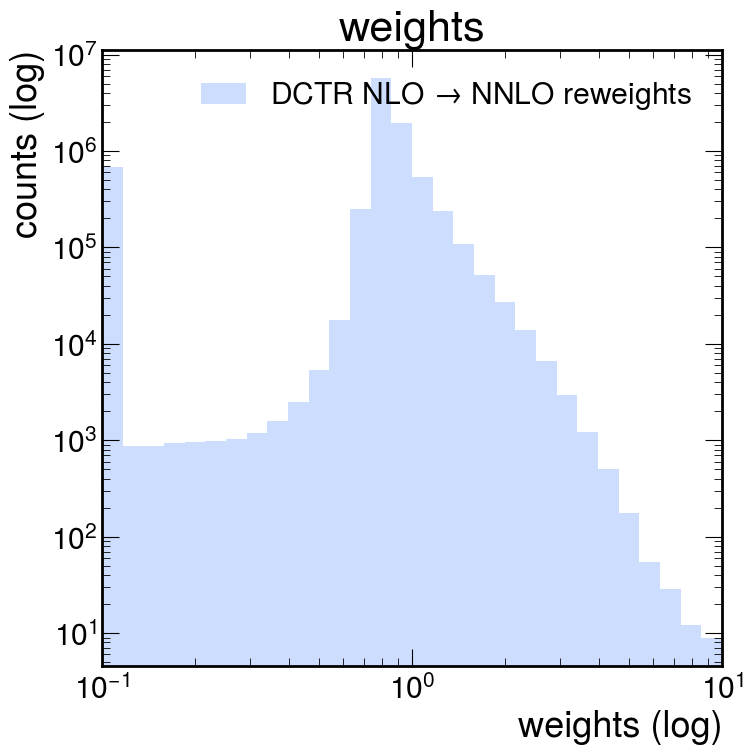

In [14]:
wgts_plot = [(dctr_rwgt[0], r'DCTR NLO $\to$ NNLO reweights')]

DCTR.plot_weights(wgts_plot, start = 0.1, stop = 10)

# apply orginal generator weights to rwgt
dctr_rwgt = np.multiply(dctr_rwgt[0], X0_wgt)



In [15]:
from importlib import reload
reload(DCTR)


Madgraph was not found in PATH or in docker /tf/madgraph/MG5_aMC_v2_9_16 dir 
 can be added temporarily with sys.path.append('path/to/madgraph')


<module 'DCTR' from '/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py'>

In [16]:

pythia_text=r'$POWHEG \; pp \to  t\bar{t}$ + PYTHIA'


/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


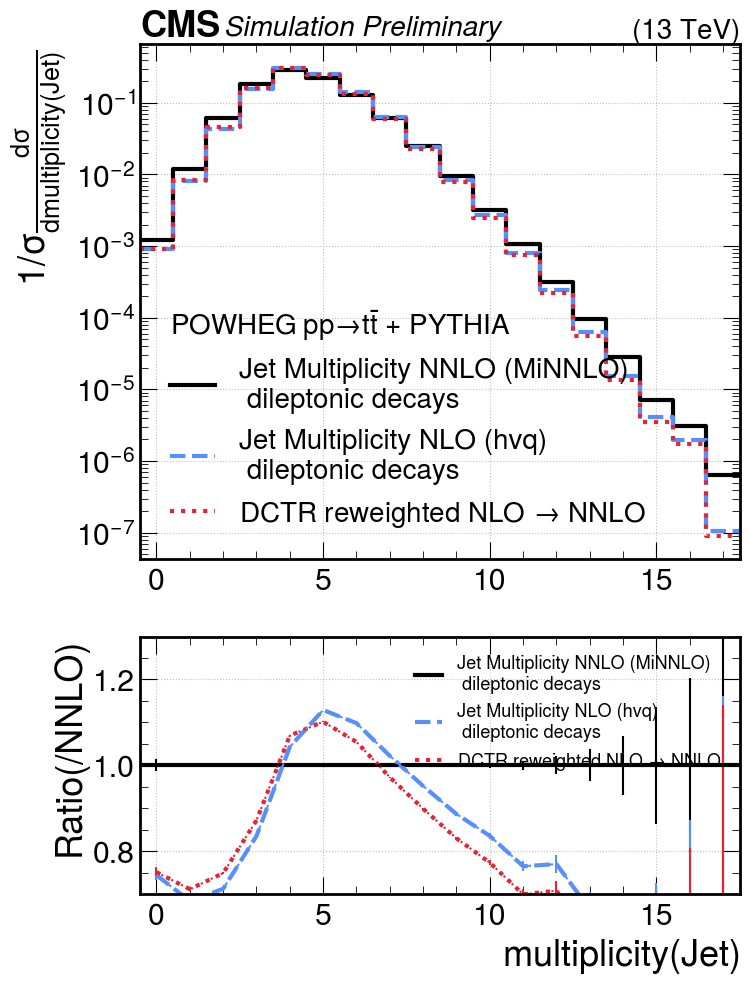

In [17]:
# jet multiplicity

args_multiplicity = [(X1_nJets[:,0], X1_wgt, 'Jet Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X0_nJets[:,0], X0_wgt, 'Jet Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X0_nJets[:,0], dctr_rwgt, r'DCTR reweighted NLO $\to$ NNLO')]

bins = np.linspace(-0.5, 17.5, 19)
ratio_ylim=[0.7, 1.3]

DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=ratio_ylim, part_label='Jet', arg_label='multiplicity', unit='', inv_unit='', pythia_text=pythia_text)


In [18]:
hists = np.load('./plots/tt-pair/plot_multiplicity_jet_histograms.npy', allow_pickle=True) # hist data is automatically saved to disk above

[dense_list, uncert_nrm_list, bin_edges] = hists

# print(dense_list)
print(np.sum(dense_list[0]))
print(np.sum(dense_list[1]))
print(np.sum(dense_list[2]))


1.0000006410291749
1.0000001040033069
1.000000090426345


/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


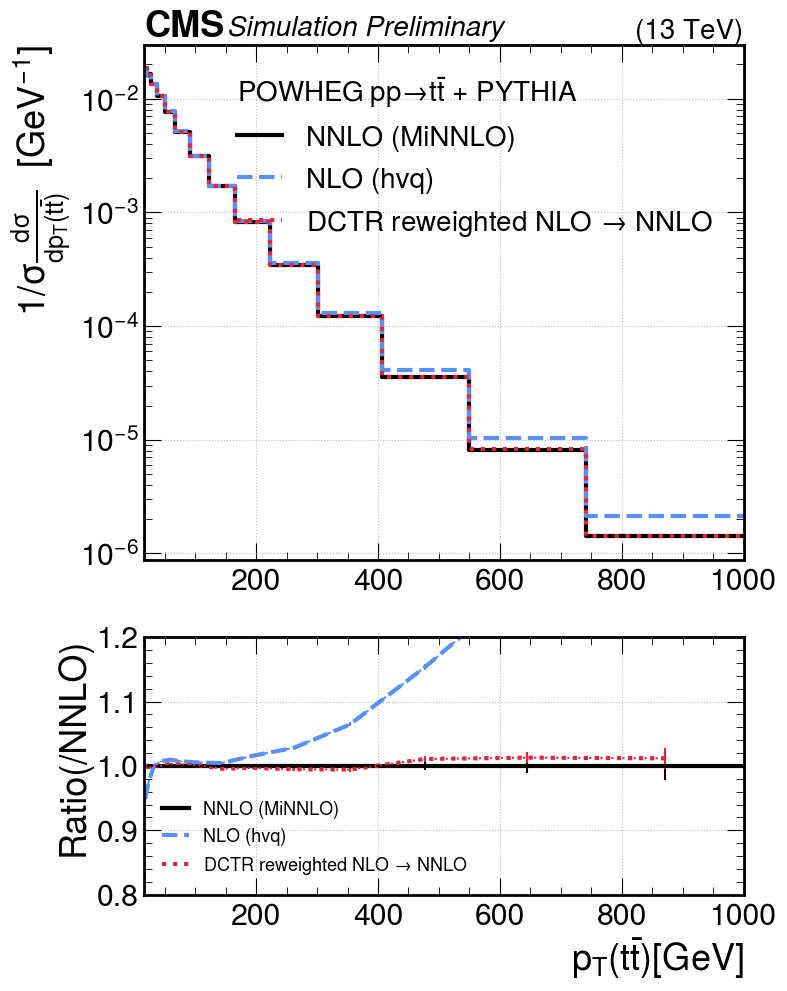

In [19]:
# pT to make sure our regular obs is working

args = [(X1, X1_wgt, 'NNLO (MiNNLO)'),
        (X0, X0_wgt, 'NLO (hvq)'),
        (X0, dctr_rwgt, r'DCTR reweighted NLO $\to$ NNLO')]


bins = np.logspace(np.log10(15), np.log10(1000), 15)

DCTR.plot_ratio_cms(args, bins = bins, y_scale = 'log', ratio_ylim=[0.8, 1.2], pythia_text=pythia_text)


/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


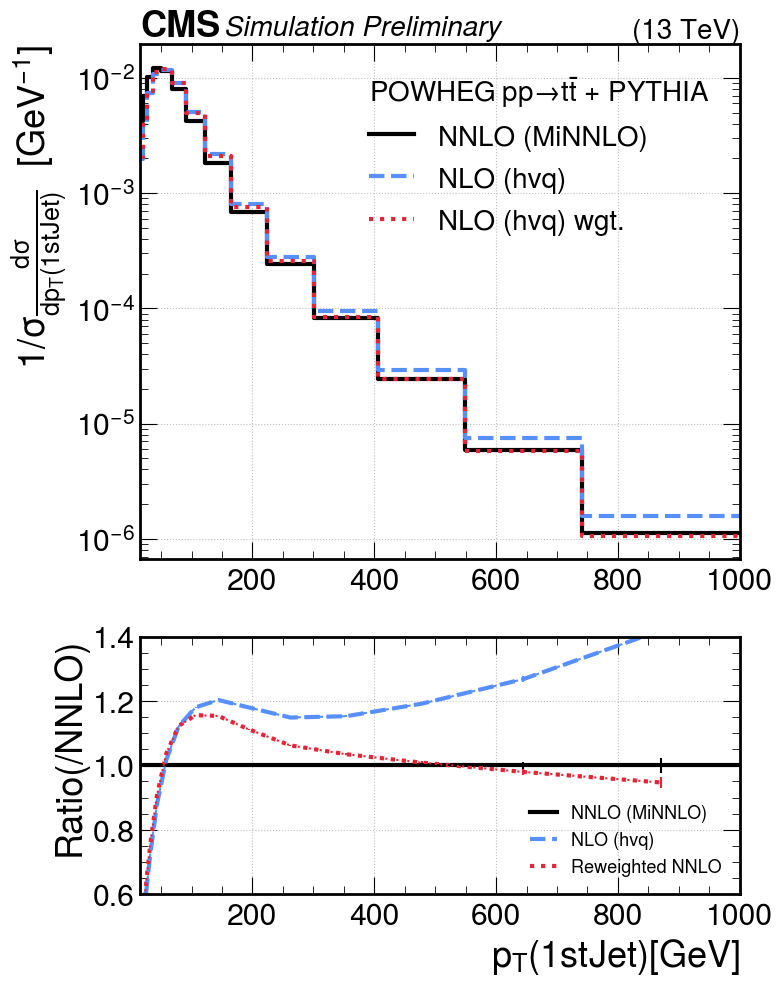

/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


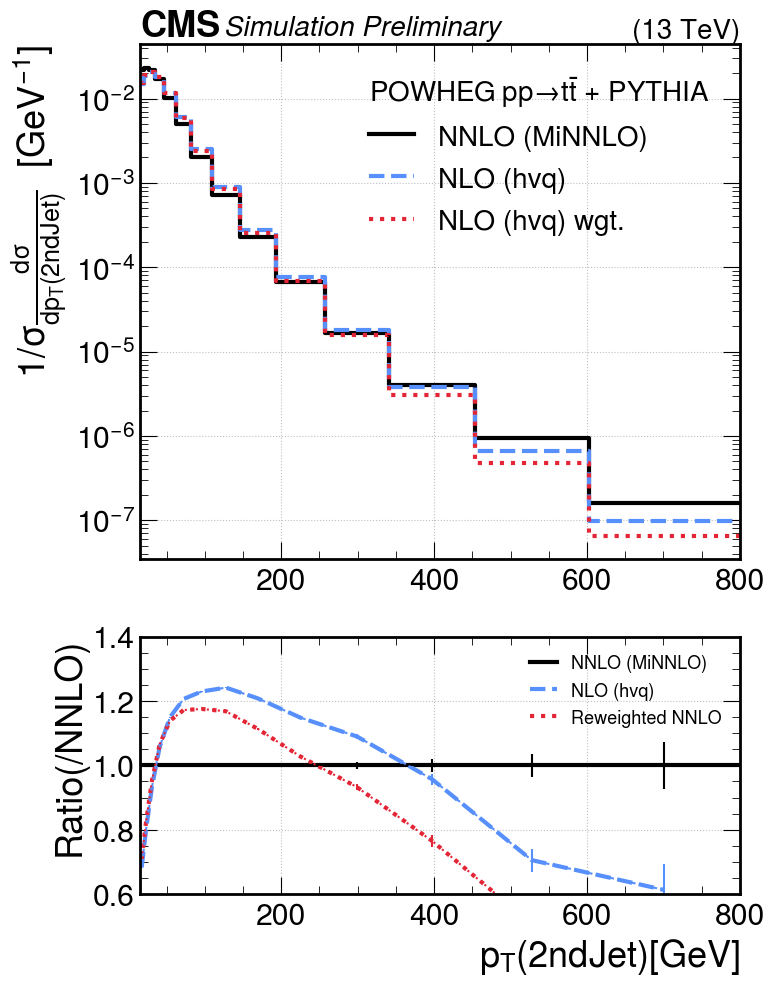

/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


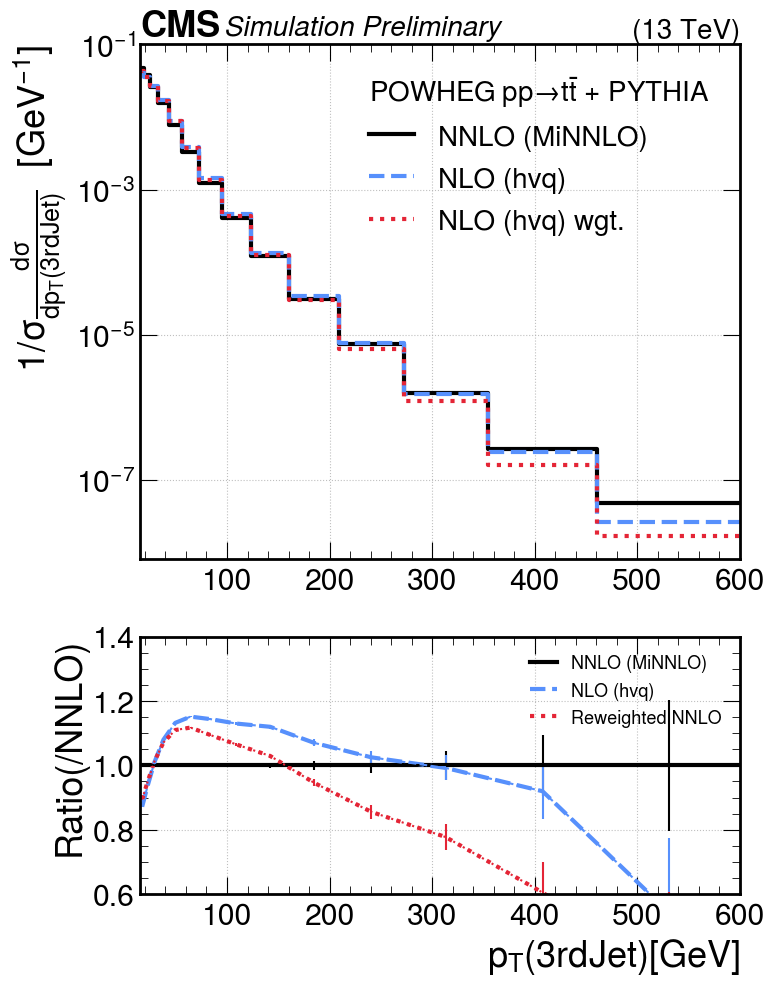

In [28]:
# no b-jets pT

# 1st jet
log_bins = np.logspace(np.log10(15), np.log10(1000), 15)
args_jet_0 = [(X1_no_b_jet[:, 0, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_no_b_jet[:, 0, 0], X0_wgt, 'NLO (hvq)'),
              (X0_no_b_jet[:, 0, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_0, y_scale = 'log', part_label='1st Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text, save_prefix = 'no_b_jets_')

log_bins = np.logspace(np.log10(15), np.log10(800), 15)
args_jet_1 = [(X1_no_b_jet[:, 1, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_no_b_jet[:, 1, 0], X0_wgt, 'NLO (hvq)'),
              (X0_no_b_jet[:, 1, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_1, y_scale = 'log', part_label='2nd Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text, save_prefix = 'no_b_jets_')

log_bins = np.logspace(np.log10(15), np.log10(600), 15)
args_jet_2 = [(X1_no_b_jet[:, 2, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_no_b_jet[:, 2, 0], X0_wgt, 'NLO (hvq)'),
              (X0_no_b_jet[:, 2, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_2, y_scale = 'log', part_label='3rd Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text, save_prefix = 'no_b_jets_')



/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


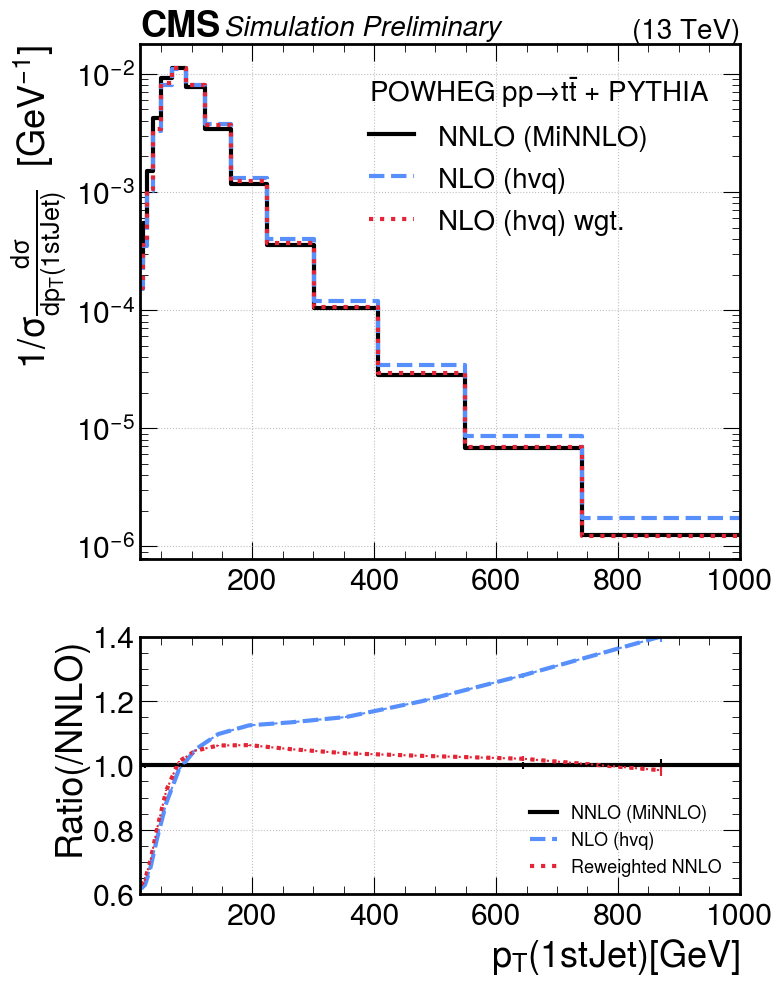

/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


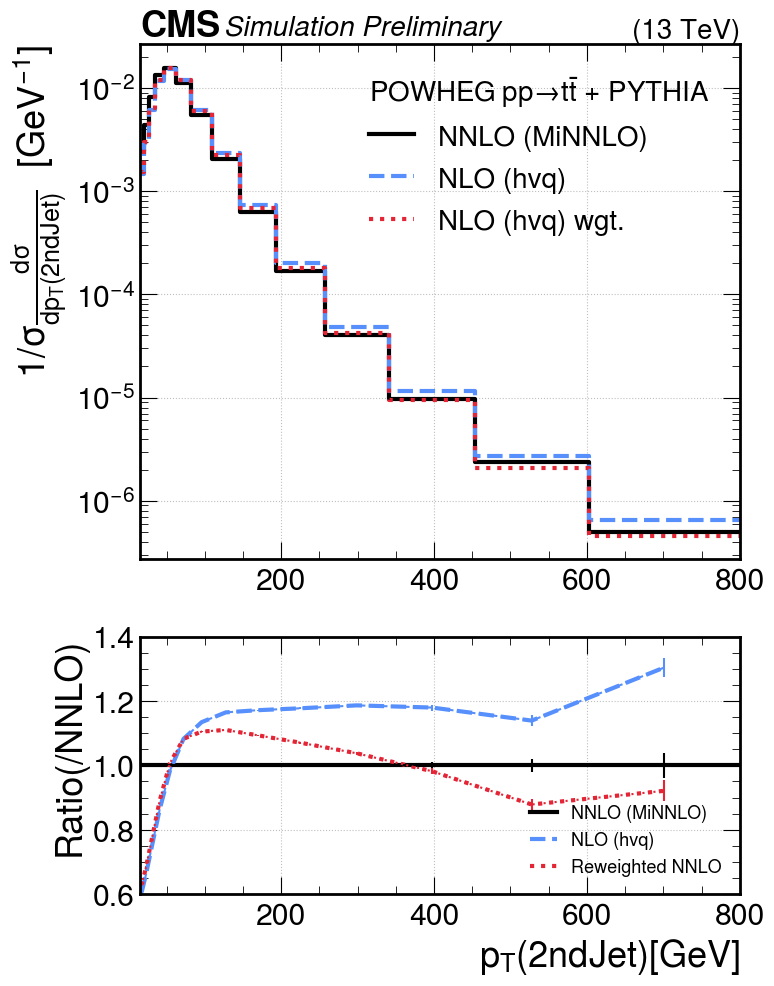

/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


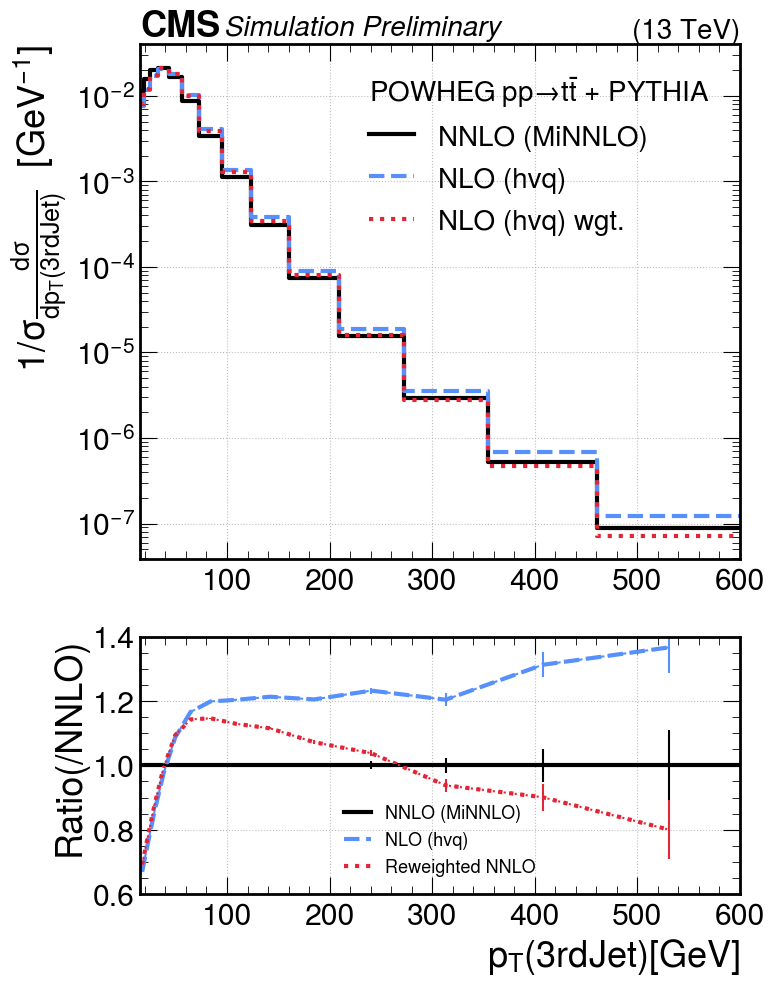

In [29]:
# jet (including b jet) pT

# 1st jet
log_bins = np.logspace(np.log10(15), np.log10(1000), 15)
args_jet_0 = [(X1_jet[:, 0, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 0, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 0, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_0, y_scale = 'log', part_label='1st Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text, save_prefix = 'with_b_jets_')

log_bins = np.logspace(np.log10(15), np.log10(800), 15)
args_jet_1 = [(X1_jet[:, 1, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 1, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 1, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_1, y_scale = 'log', part_label='2nd Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text, save_prefix = 'with_b_jets_')

log_bins = np.logspace(np.log10(15), np.log10(600), 15)
args_jet_2 = [(X1_jet[:, 2, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 2, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 2, 0], dctr_rwgt, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_2, y_scale = 'log', part_label='3rd Jet', ratio_ylim=(0.6, 1.4), bins = log_bins, pythia_text=pythia_text, save_prefix = 'with_b_jets_')



In [21]:
print(X0_b_jets.shape)
print(X1_b_jets.shape)


(9686913, 2, 6)
(9686913, 2, 6)


In [22]:
X0_b_jets_pt_concat = np.concatenate((X0_b_jets[:,0, 0], X0_b_jets[:,1, 0]))
X1_b_jets_pt_concat = np.concatenate((X1_b_jets[:,0, 0], X1_b_jets[:,1, 0]))

X0_wgt_concat = np.concatenate((X0_wgt, X0_wgt))
X1_wgt_concat = np.concatenate((X1_wgt, X1_wgt))

dctr_rwgt_concat = np.concatenate((dctr_rwgt, dctr_rwgt))

print(X0_b_jets_pt_concat.shape)
print(X1_b_jets_pt_concat.shape)

print(X0_wgt_concat.shape)
print(X1_wgt_concat.shape)

print(dctr_rwgt_concat.shape)

(19373826,)
(19373826,)
(19373826,)
(19373826,)
(19373826,)


/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


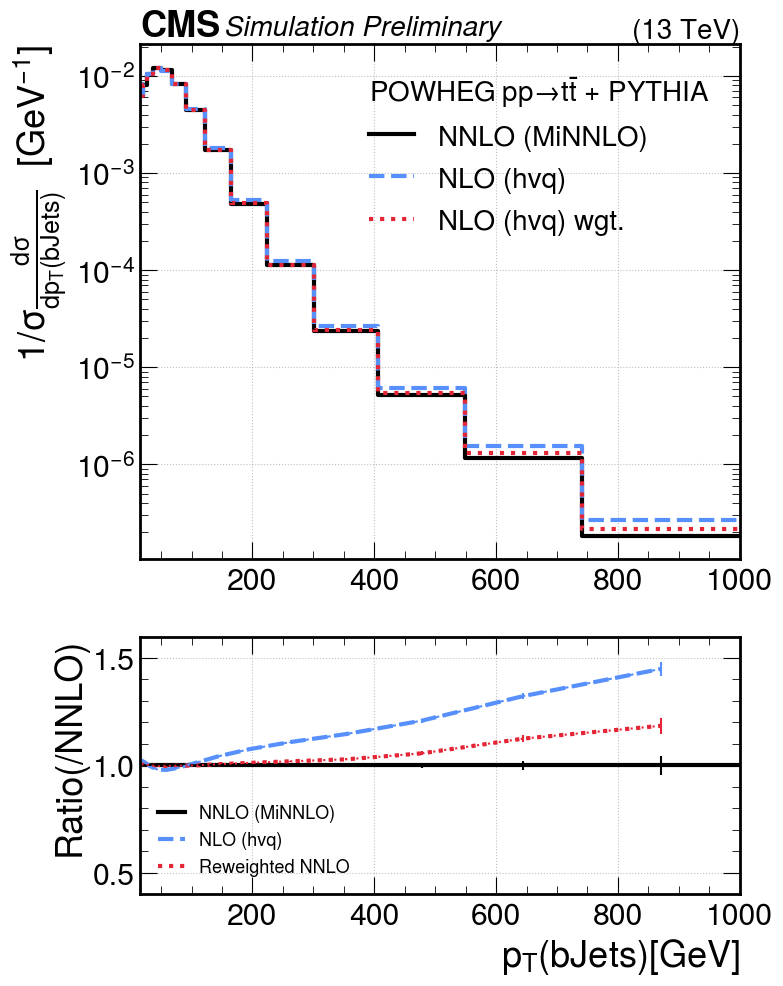

In [30]:
# b-jet pT

log_bins = np.logspace(np.log10(15), np.log10(1000), 15)
args_jet_0 = [(X1_b_jets_pt_concat, X1_wgt_concat, 'NNLO (MiNNLO)'),
              (X0_b_jets_pt_concat, X0_wgt_concat, 'NLO (hvq)'),
              (X0_b_jets_pt_concat, dctr_rwgt_concat, 'NLO (hvq) wgt.')]

DCTR.plot_ratio_cms(args_jet_0, y_scale = 'log', part_label='b Jets', ratio_ylim=(0.4, 1.6), bins = log_bins, pythia_text=pythia_text)


np.shape(X0_jet_pt_sums) = (9686913,)
np.shape(X1_jet_pt_sums) = (9686913,)


/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


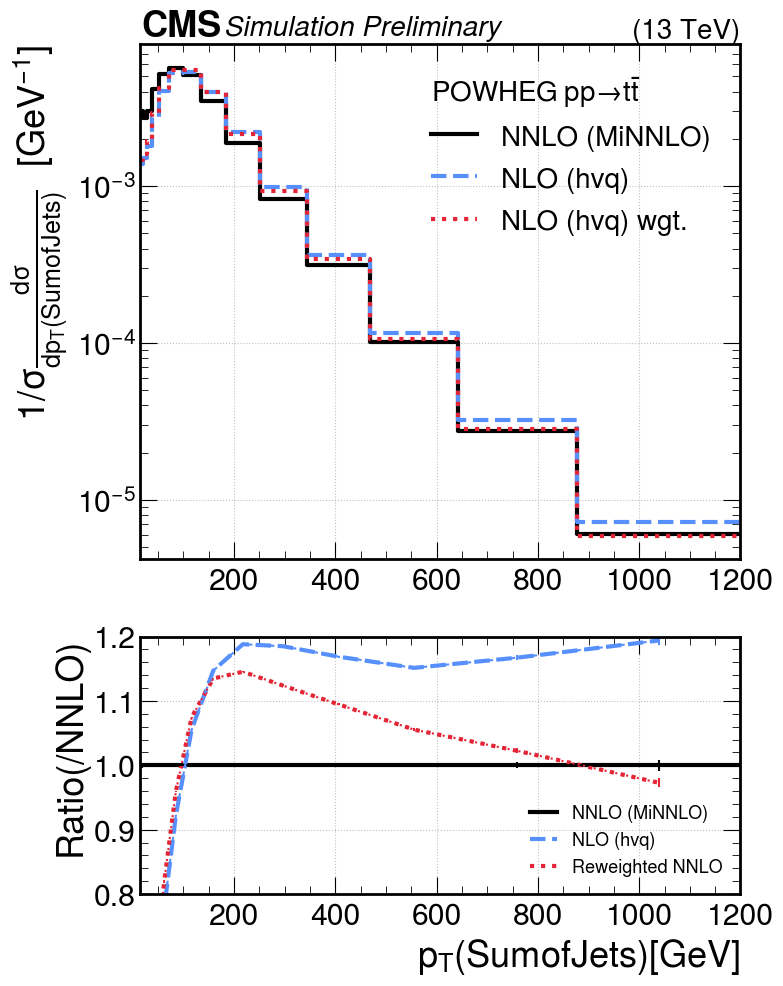

In [27]:
# sum of jet (no b jets) pt per event

X0_jet_pt_sums = []
for event in X0_no_b_jet:
    X0_jet_pt_sums.append(np.sum(event[:,0]))

X1_jet_pt_sums = []
for event in X1_no_b_jet:
    X1_jet_pt_sums.append(np.sum(event[:,0]))

    
print(f'{np.shape(X0_jet_pt_sums) = }')
print(f'{np.shape(X1_jet_pt_sums) = }')


args_jet_sum = [(np.array(X1_jet_pt_sums), X1_wgt, 'NNLO (MiNNLO)'),
                (np.array(X0_jet_pt_sums), X0_wgt, 'NLO (hvq)'),
                (np.array(X0_jet_pt_sums), dctr_rwgt, 'NLO (hvq) wgt.')]

log_bins = np.logspace(np.log10(15), np.log10(1200), 15)
lin_bins = np.linspace(15, 800, 15)

DCTR.plot_ratio_cms(args_jet_sum, bins = log_bins, y_scale = 'log', part_label='Sum of Jets', ratio_ylim=(0.8, 1.2))



np.shape(X0_jet_pt_sums) = (9686913,)
np.shape(X1_jet_pt_sums) = (9686913,)


/media/finn/Temp/DCTR_Paper/DCTR_FP/20240903_jets_FINAL_FSR-MPI-HadronLevel_all/../DCTR.py:1282: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


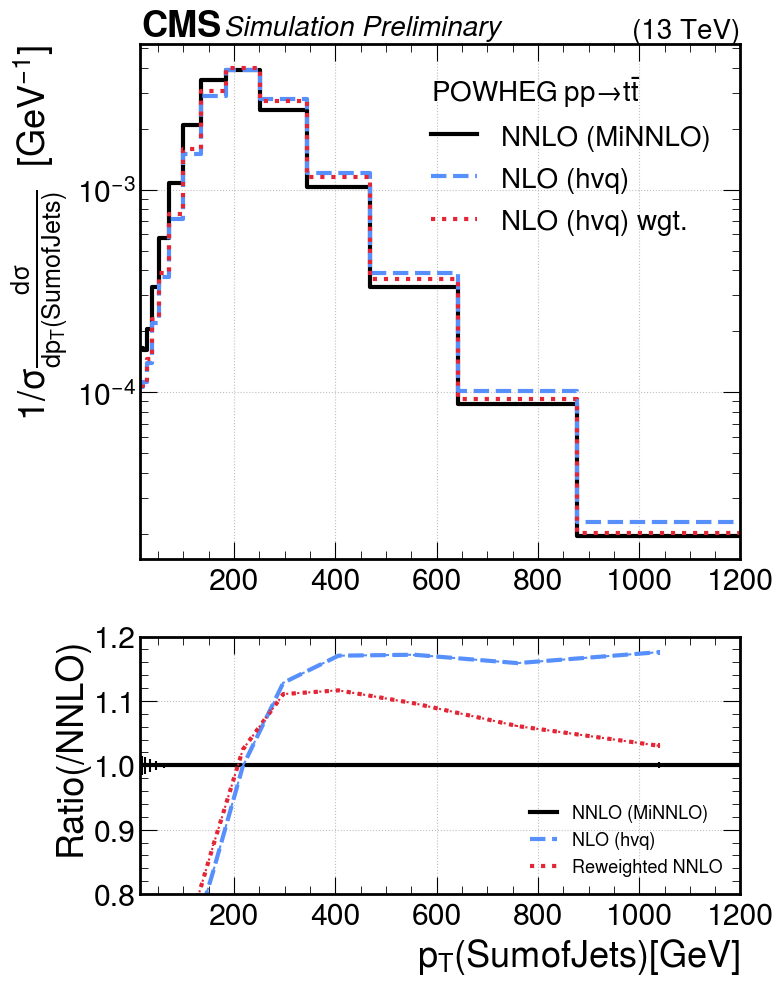

In [26]:
# sum of jets (incl b jets) pt per event

X0_jet_pt_sums = []
for event in X0_jet:
    X0_jet_pt_sums.append(np.sum(event[:,0]))

X1_jet_pt_sums = []
for event in X1_jet:
    X1_jet_pt_sums.append(np.sum(event[:,0]))

    
print(f'{np.shape(X0_jet_pt_sums) = }')
print(f'{np.shape(X1_jet_pt_sums) = }')


args_jet_sum = [(np.array(X1_jet_pt_sums), X1_wgt, 'NNLO (MiNNLO)'),
                (np.array(X0_jet_pt_sums), X0_wgt, 'NLO (hvq)'),
                (np.array(X0_jet_pt_sums), dctr_rwgt, 'NLO (hvq) wgt.')]

log_bins = np.logspace(np.log10(15), np.log10(1200), 15)
lin_bins = np.linspace(15, 800, 15)

DCTR.plot_ratio_cms(args_jet_sum, bins = log_bins, y_scale = 'log', part_label='Sum of Jets', ratio_ylim=(0.8, 1.2))

